In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.show()

In [58]:
# PIE Chart function
def Pie_chart(Values = [], Labels = [], Title = "", Percentage = False):
    plt.figure()
    fig, axes = plt.subplots(1, figsize=(10,8))
    fig.suptitle(Title, fontsize = "30")
    def abs_value(val):
        a  = np.round((val/100.0)*sum(Values), 0)
        return str(int(a))
    def percent_value(val):
        val = np.round(val, 1)
        return str(val)+ " %"
    axes.pie(Values , explode = [0.01]*len(Values), labels = Labels, textprops={'fontsize': 20}, autopct= (percent_value if(Percentage == True) else abs_value))
    plt.savefig('C:/Users/253693/Documents/Python Scripts/Image/'+Title+".png" , dpi=300)

In [169]:
# BAR Graph function
def Bar_plot(Values = [], Labels = [], Data_lab = [], Title = "", Xlabel = "", Ylabel = "", Ymin = 0, Ymax = 100):
    fig, axes = plt.subplots(1, figsize=(12,8))
    axes.grid(which = "both", fillstyle = "full", color = "white")
    axes.set_axisbelow(True)
    axes.set_facecolor((0.88, 0.88, 0.88))
    axes.bar(Labels, Values, edgecolor = "black")
    fig.suptitle(Title, fontsize = 30 )
    axes.set_xlabel(Xlabel, fontsize = 20)
    axes.set_ylabel(Ylabel, fontsize = 20)
    axes.set_xticklabels(Labels, rotation=30,fontsize=15)
    #axes.set_yticklabels(list("mnopqr"), rotation=0, fontsize=15)
    axes.set_ylim([Ymin, Ymax])
    rects = axes.patches
    labels = Data_lab

    for rect, label in zip(rects, labels):
        height = rect.get_height()
        axes.text(rect.get_x() + rect.get_width() / 2, height+0.5, label, ha='center', va='bottom', color = "black", fontsize = 15)
    plt.savefig('C:/Users/253693/Documents/Python Scripts/Image/'+Title+".png" , dpi=300)


In [60]:
# Data Read
VGD = pd.read_csv("Data/VGD.csv")
AC = pd.read_csv("Data/AC.csv")
CF = pd.read_csv("Data/CF.csv")
OCC = pd.read_csv("Data/OCC.csv")
SEAT = pd.read_csv("Data/SEAT.csv")

# M1 Vehicles & Fatal

In [61]:
VGD_CLASS = VGD[["JPRCDSID","VEHNO" ,"CLASS"]]
OCC_CLASS = OCC[["JPRCDSID", "VEHNO" ,"HISPID"]]
OCC_GRP = OCC_CLASS.groupby(["JPRCDSID", "VEHNO"])
OCC_GRP = OCC_CLASS.groupby(["JPRCDSID", "VEHNO"])["HISPID"].apply(lambda x: list(x))
OCC_GRP = pd.DataFrame(OCC_GRP)
OCC_GRP.reset_index(inplace=True)
M1_CLASS = VGD_CLASS[VGD_CLASS["CLASS"].isin([1,2,3,4,5,6,11,12,13,21])]
print("Only M1 Vehicles "+ str(len(M1_CLASS)))
temp_OCC_GRP = OCC_GRP[[True if (1 in i or 2 in i)  else False for i in OCC_GRP["HISPID"]]]
M1_FAT_SER = pd.merge(M1_CLASS, temp_OCC_GRP, on =["JPRCDSID", "VEHNO"], how = "inner")
print("Vehicles with atleast one fatal or serious injury "+ str(len(temp_OCC_GRP)))
print("M1 category Vehicles with atleast one fatal or serious injury "+ str(len(M1_FAT_SER)))
M1_FAT_SER_uniq = M1_FAT_SER.groupby(["JPRCDSID","VEHNO"]).size().reset_index(name='Freq')    ## IMPORTANT
#print(len(M1_FAT_SER_uniq))

### VGD will have unique "JPRCDSID" + "VEHNO" pair as each data row points to one vehicle.
### temp_OCC_GRP will contain unique "JPRCDSID" + "VEHNO" pair as it has been grouped on the based of this pair
### and HISPID data appened in a list for each group.

Only M1 Vehicles 1624
Vehicles with atleast one fatal or serious injury 2195
M1 category Vehicles with atleast one fatal or serious injury 599


# Problem 1

<Figure size 432x288 with 0 Axes>

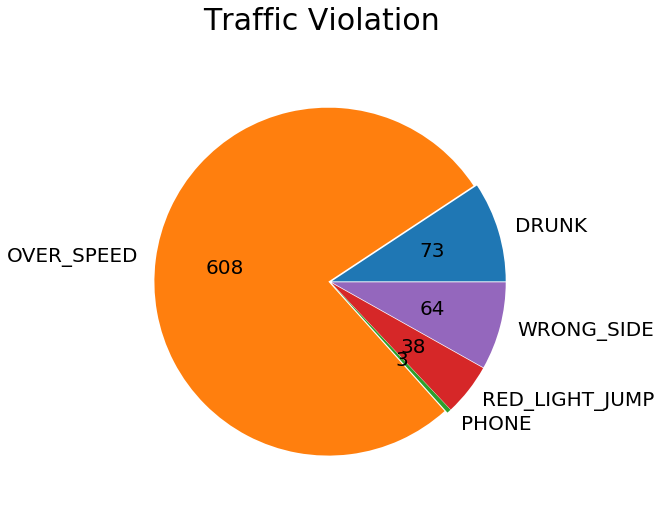

<Figure size 432x288 with 0 Axes>

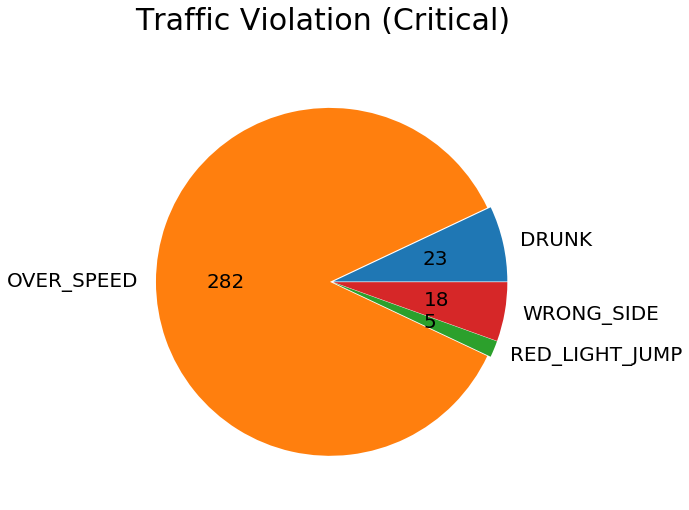

In [62]:
CF_short = CF[["JPRCDSID", "CF_CODE"]]
TRAF_M1 = CF_short[CF_short["JPRCDSID"].isin(M1_CLASS["JPRCDSID"])]
TRAF_M1_FAT = CF_short[CF_short["JPRCDSID"].isin(M1_FAT_SER["JPRCDSID"])]
TRAF_M1 = TRAF_M1.copy()
TRAF_M1_FAT = TRAF_M1_FAT.copy()
TRAF_M1["CF_CODE_VALUES"] = ["OVER_SPEED" if(i in([1201,1202,1203])) else "WRONG_SIDE" if(i in([1402])) else "DRUNK" if(i in([1101])) else "PHONE" if(i in([1301])) else "RED_LIGHT_JUMP" if(i in([1409])) else "OTHER" for i in TRAF_M1["CF_CODE"]]
TRAF_M1_FAT["CF_CODE_VALUES"] = ["OVER_SPEED" if(i in([1201,1202,1203])) else "WRONG_SIDE" if(i in([1402])) else "DRUNK" if(i in([1101])) else "PHONE" if(i in([1301])) else "RED_LIGHT_JUMP" if(i in([1409])) else "OTHER" for i in TRAF_M1_FAT["CF_CODE"]]
GRP_TRAF_M1 = TRAF_M1.groupby("CF_CODE_VALUES")
GRP_TRAF_M1_FAT = TRAF_M1_FAT.groupby("CF_CODE_VALUES")
GRP_TRAF_M1_SIZE = GRP_TRAF_M1.size().drop(["OTHER"])
GRP_TRAF_M1_FAT_SIZE = GRP_TRAF_M1_FAT.size().drop(["OTHER"])
Pie_chart(Values = GRP_TRAF_M1_SIZE.values , Labels = GRP_TRAF_M1_SIZE.index, Title = "Traffic Violation", Percentage = False)
Pie_chart(Values = GRP_TRAF_M1_FAT_SIZE.values , Labels = GRP_TRAF_M1_FAT_SIZE.index, Title = "Traffic Violation (Critical)", Percentage = False)

# Problem 2

<Figure size 432x288 with 0 Axes>

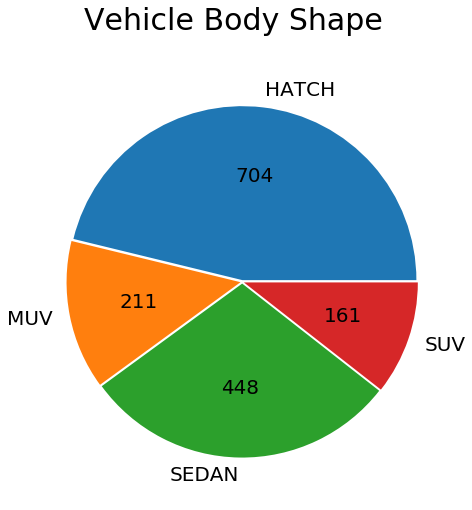

<Figure size 432x288 with 0 Axes>

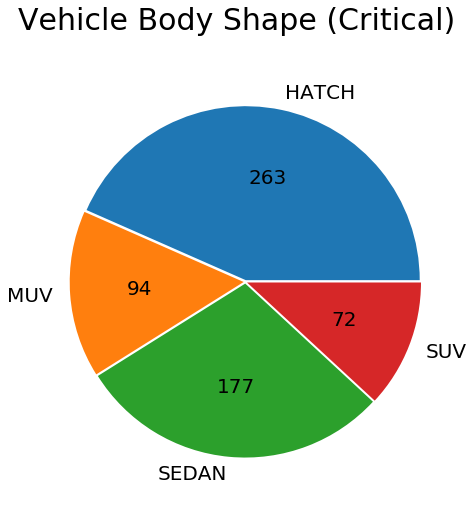

In [63]:
VGD_short = VGD[["JPRCDSID", "BODYTYPE"]]
VHL_BODY_M1 = VGD_short[VGD_short["JPRCDSID"].isin(M1_CLASS["JPRCDSID"])]
VHL_BODY_M1_FAT = VGD_short[VGD_short["JPRCDSID"].isin(M1_FAT_SER["JPRCDSID"])]
VHL_BODY_M1 = VHL_BODY_M1.copy()
VHL_BODY_M1_FAT = VHL_BODY_M1_FAT.copy()
VHL_BODY_M1["BODYTYPE_Values"] = ["HATCH" if(i in([1])) else "SEDAN" if(i in([2])) else "SUV" if(i in([7])) else "MUV" if(i in([6])) else "OTHER" for i in VHL_BODY_M1["BODYTYPE"]]
VHL_BODY_M1_FAT["BODYTYPE_Values"] = ["HATCH" if(i in([1])) else "SEDAN" if(i in([2])) else "SUV" if(i in([7])) else "MUV" if(i in([6])) else "OTHER" for i in VHL_BODY_M1_FAT["BODYTYPE"]]
GRP_VHL_BODY_M1 = VHL_BODY_M1.groupby("BODYTYPE_Values")
GRP_VHL_BODY_M1_FAT = VHL_BODY_M1_FAT.groupby("BODYTYPE_Values")
GRP_VHL_BODY_M1_SIZE = GRP_VHL_BODY_M1.size().drop(["OTHER"])
GRP_VHL_BODY_M1_FAT_SIZE = GRP_VHL_BODY_M1_FAT.size().drop(["OTHER"])
Pie_chart(Values = GRP_VHL_BODY_M1_SIZE.values , Labels = GRP_VHL_BODY_M1_SIZE.index, Title = "Vehicle Body Shape", Percentage = False)
Pie_chart(Values = GRP_VHL_BODY_M1_FAT_SIZE.values , Labels = GRP_VHL_BODY_M1_FAT_SIZE.index, Title = "Vehicle Body Shape (Critical)", Percentage = False)

# Problem 3

temp_1 FRONT_Left883
224
temp_1 FRONT_Right1593
382
temp_1 SECOND_Seat1290
0
temp_2 FRONT_Left378
82
temp_2 FRONT_Right464
107
temp_2 SECOND_Seat501
0
['FRONT_Left', 'FRONT_Right', 'SECOND_Seat']
[21.69, 23.06, 0.0]


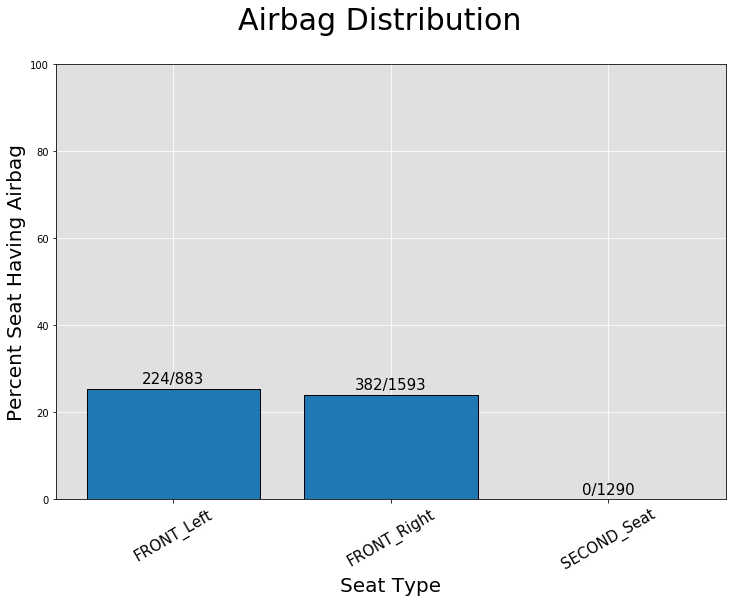

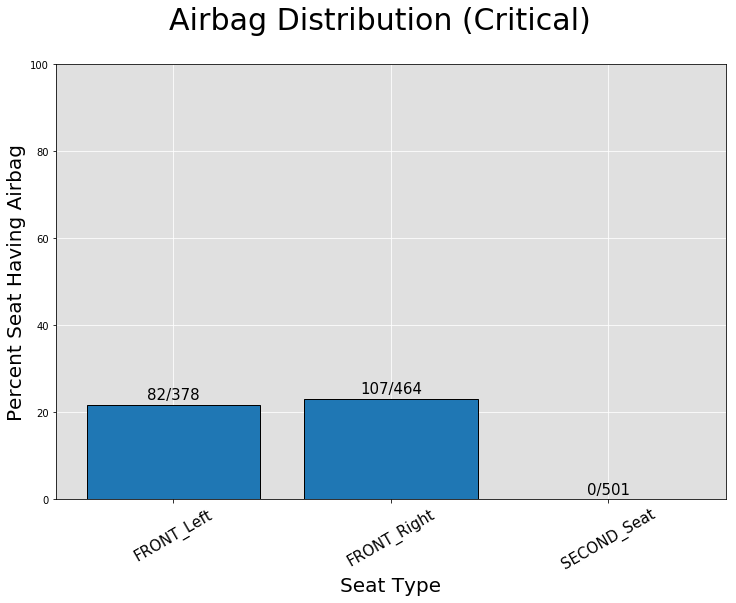

In [246]:
VGD_OCC = pd.merge(VGD, OCC, on = ["JPRCDSID","VEHNO"], how = "inner")    ## VGD gives CLASS and OCC gives occupant detail
SEAT_VGD_OCC = pd.merge(VGD_OCC, SEAT, on = ["JPRCDSID","VEHNO", "OCCNO", "SEATPOS"], how = "inner")
M1_CLASS_SEAT = SEAT_VGD_OCC[SEAT_VGD_OCC["CLASS"].isin([1,2,3,4,5,6,11,12,13,21])]
M1_FAT_CLASS_SEAT = M1_CLASS[M1_CLASS["HISPID"].isin([1,2])]
M1_CLASS_SEAT = M1_CLASS_SEAT.copy()
M1_FAT_CLASS_SEAT = M1_FAT_CLASS_SEAT.copy()
M1_CLASS_SEAT["SEAT_Type"] = ["FRONT_Left" if(i in([11])) else "FRONT_Right" if(i in([13])) else "SECOND_Seat" if(i in([21,22,23,24,25])) else "OTHER" for i in M1_CLASS_SEAT["SEATPOS"]]
M1_FAT_CLASS_SEAT["SEAT_Type"] = ["FRONT_Left" if(i in([11])) else "FRONT_Right" if(i in([13])) else "SECOND_Seat" if(i in([21,22,23,24,25])) else "OTHER" for i in M1_FAT_CLASS_SEAT["SEATPOS"]]
GRP_M1_CLASS_SEAT = M1_CLASS_SEAT.groupby("SEAT_Type")
GRP_M1_FAT_CLASS_SEAT = M1_FAT_CLASS_SEAT.groupby("SEAT_Type")


GRP_M1_SEAT_short_list_name = []
GRP_M1_SEAT_short_list_data = []
GRP_M1_FAT_SEAT_short_list_name = []
GRP_M1_FAT_SEAT_short_list_data = []
data_label_1 = []
data_label_2 = []
temp_1 = 0
temp_2 = 0
for name, data in GRP_M1_CLASS_SEAT:
    if(name != "OTHER"):
        GRP_M1_SEAT_short_list_name.append(name)
        temp_1 = len(data)
        print("temp_1 "+ name + str(temp_1))
        print(len(data[data["BAGAVAIL"] == 1]))
        data_label_1.append(str(len(data[data["BAGAVAIL"] == 1])) + "/"+ str(len(data)))
        GRP_M1_SEAT_short_list_data.append(np.round((len(data[data["BAGAVAIL"] == 1]) / temp_1)*100 , 2))
for name, data in GRP_M1_FAT_CLASS_SEAT:
    if(name != "OTHER"):
        GRP_M1_FAT_SEAT_short_list_name.append(name)
        temp_2 = len(data)
        print("temp_2 "+ name + str(temp_2))
        print(len(data[data["BAGAVAIL"] == 1]))
        data_label_2.append(str(len(data[data["BAGAVAIL"] == 1])) + "/"+ str(len(data)))
        GRP_M1_FAT_SEAT_short_list_data.append(np.round((len(data[data["BAGAVAIL"] == 1]) / temp_2)*100 , 2))
print(GRP_M1_SEAT_short_list_name)
print(GRP_M1_FAT_SEAT_short_list_data)

Bar_plot(Values = GRP_M1_SEAT_short_list_data, Labels = GRP_M1_SEAT_short_list_name,Data_lab = data_label_1 , Title = "Airbag Distribution", Xlabel = "Seat Type", Ylabel = "Percent Seat Having Airbag")
Bar_plot(Values = GRP_M1_FAT_SEAT_short_list_data, Labels = GRP_M1_FAT_SEAT_short_list_name,Data_lab = data_label_2 , Title = "Airbag Distribution (Critical)", Xlabel = "Seat Type", Ylabel = "Percent Seat Having Airbag")

# Problem 4

AGE_Type
0_10         85
10_20       237
20_30       672
30_40       432
40_50       261
50_60       166
60_70        80
70_80        20
80_90         2
UNKNOWN    2151
dtype: int64
AGE_Type
0_10        39
10_20      112
20_30      304
30_40      184
40_50      142
50_60       95
60_70       50
70_80       14
80_90        2
UNKNOWN    534
dtype: int64


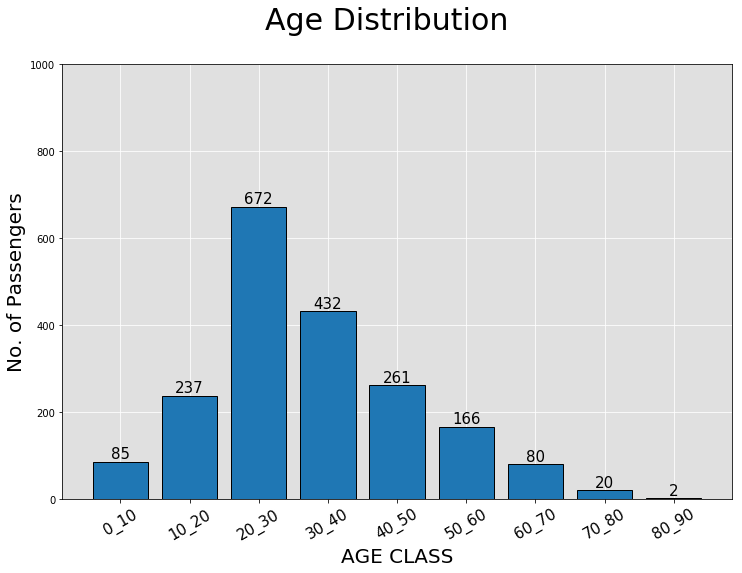

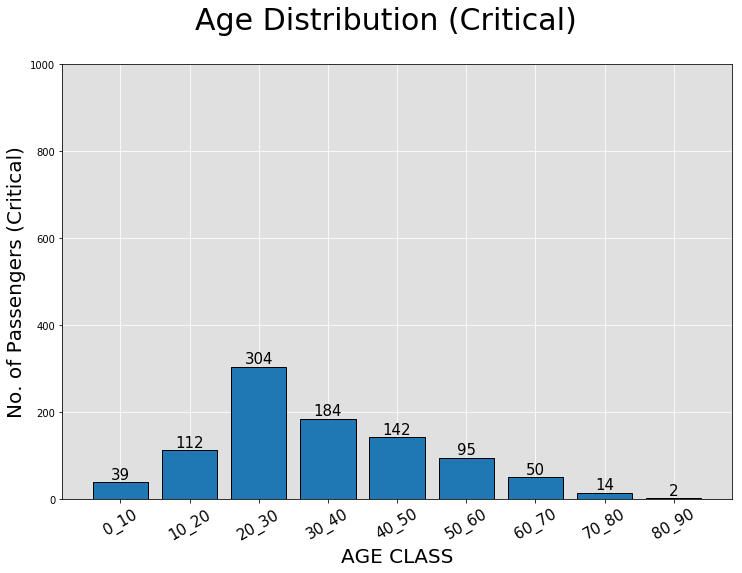

In [250]:
VGD_OCC = pd.merge(VGD, OCC, on = ["JPRCDSID","VEHNO"], how = "inner")
M1_CLASS_OCC = VGD_OCC[VGD_OCC["CLASS"].isin([1,2,3,4,5,6,11,12,13,21])]
M1_FAT_CLASS_OCC = M1_CLASS_OCC[M1_CLASS_OCC["HISPID"].isin([1,2])]
#print(len(M1_CLASS_OCC))
M1_CLASS_OCC = M1_CLASS_OCC.copy()
M1_FAT_CLASS_OCC = M1_FAT_CLASS_OCC.copy()
#print(len(M1_CLASS_OCC))
#print(len(M1_FAT_CLASS_OCC))
M1_CLASS_OCC["AGE_Type"] = ["0_10" if(i in(list(range(0,11)))) else "10_20" if(i in(list(range(11,21)))) else "20_30" if(i in(list(range(21,31)))) else "30_40" if(i in(list(range(31,41)))) else "40_50" if(i in(list(range(41,51)))) else "50_60" if(i in(list(range(51,61)))) else "60_70" if(i in(list(range(61,71)))) else "70_80" if(i in(list(range(71,81)))) else "80_90" if(i in(list(range(81,91)))) else "UNKNOWN" if(i in([999999])) else "Very_OLD" for i in M1_CLASS_OCC["AGE"]]
M1_FAT_CLASS_OCC["AGE_Type"] = ["0_10" if(i in(list(range(0,11)))) else "10_20" if(i in(list(range(11,21)))) else "20_30" if(i in(list(range(21,31)))) else "30_40" if(i in(list(range(31,41)))) else "40_50" if(i in(list(range(41,51)))) else "50_60" if(i in(list(range(51,61)))) else "60_70" if(i in(list(range(61,71)))) else "70_80" if(i in(list(range(71,81)))) else "80_90" if(i in(list(range(81,91))))  else "UNKNOWN" if(i in([999999])) else "Very_OLD" for i in M1_FAT_CLASS_OCC["AGE"]]

M1_CLASS_OCC.to_csv("M1.csv")
M1_FAT_CLASS_OCC.to_csv("M1_Total.csv")

GRP_M1_CLASS_OCC = M1_CLASS_OCC.groupby("AGE_Type")
GRP_M1_FAT_CLASS_OCC = M1_FAT_CLASS_OCC.groupby("AGE_Type")

print(GRP_M1_CLASS_OCC.size())
print(GRP_M1_FAT_CLASS_OCC.size())

OCC_M1_name = []
OCC_M1_value = []
OCC_M1_FAT_name = []
OCC_M1_FAT_value = []

for name, value in GRP_M1_CLASS_OCC:
    if (name != "UNKNOWN"):
        OCC_M1_name.append(name)
        OCC_M1_value.append(len(value))
for name, value in GRP_M1_FAT_CLASS_OCC:
    if (name != "UNKNOWN"):
        OCC_M1_FAT_name.append(name)
        OCC_M1_FAT_value.append(len(value))
        
#print(OCC_M1_value)

Bar_plot(Values = OCC_M1_value, Labels = OCC_M1_name, Data_lab = OCC_M1_value , Title = "Age Distribution", Xlabel = "AGE CLASS", Ylabel = "No. of Passengers", Ymin = 0, Ymax = 1000)
Bar_plot(Values = OCC_M1_FAT_value, Labels = OCC_M1_FAT_name, Data_lab = OCC_M1_FAT_value , Title = "Age Distribution (Critical)", Xlabel = "AGE CLASS", Ylabel = "No. of Passengers (Critical)", Ymin = 0, Ymax = 1000)

# Problem 4 (b)

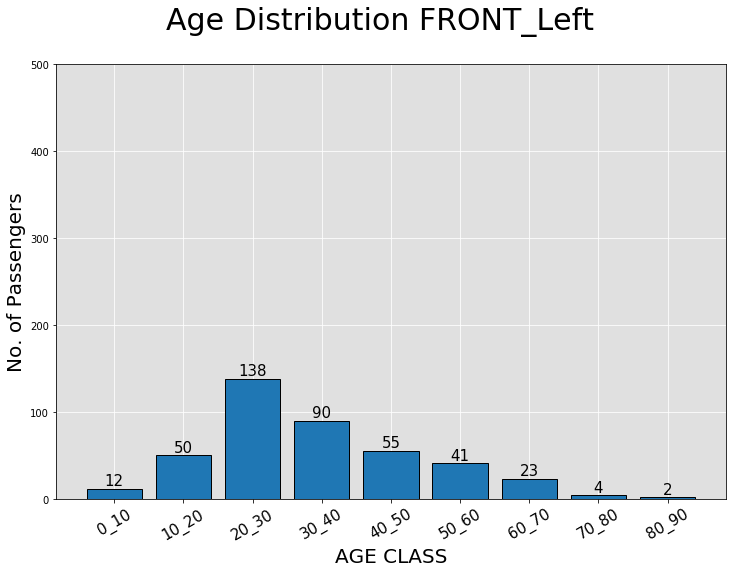

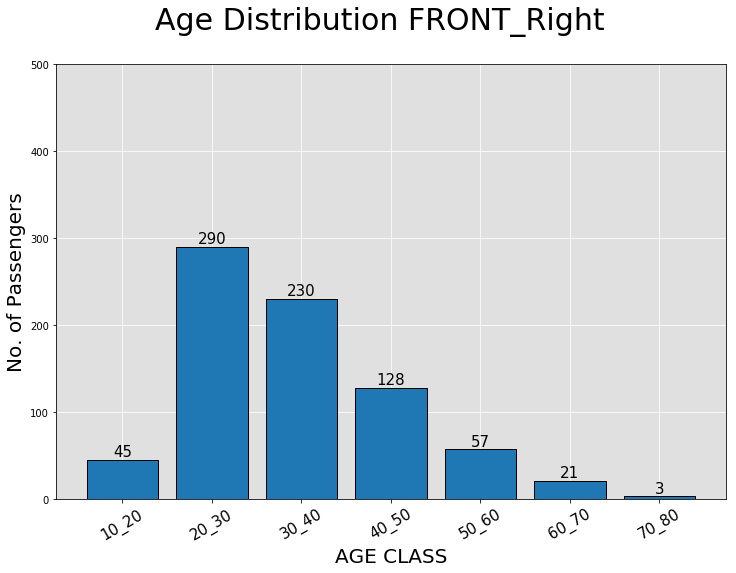

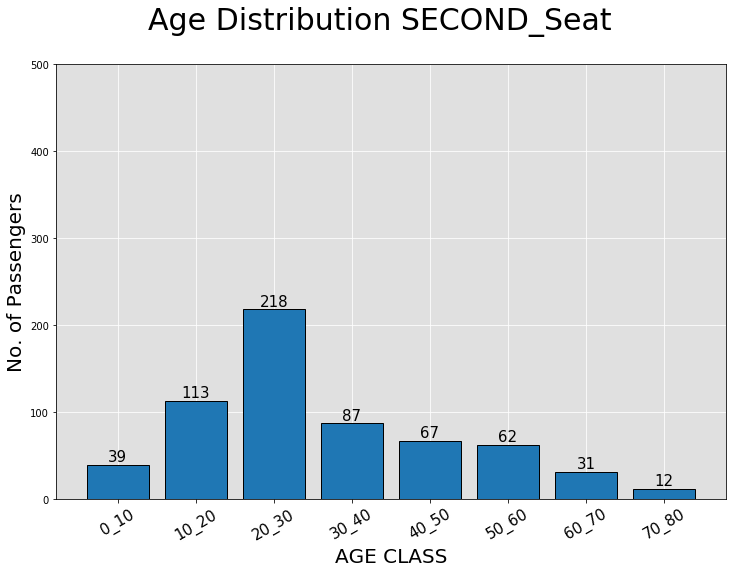

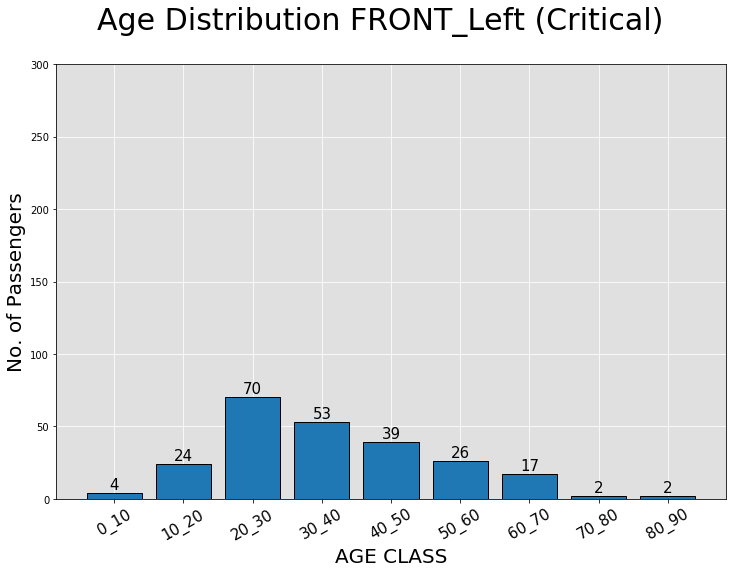

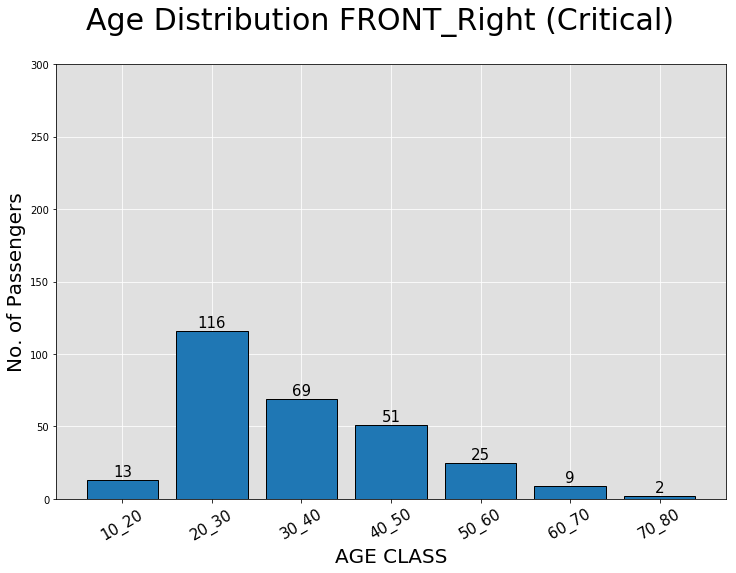

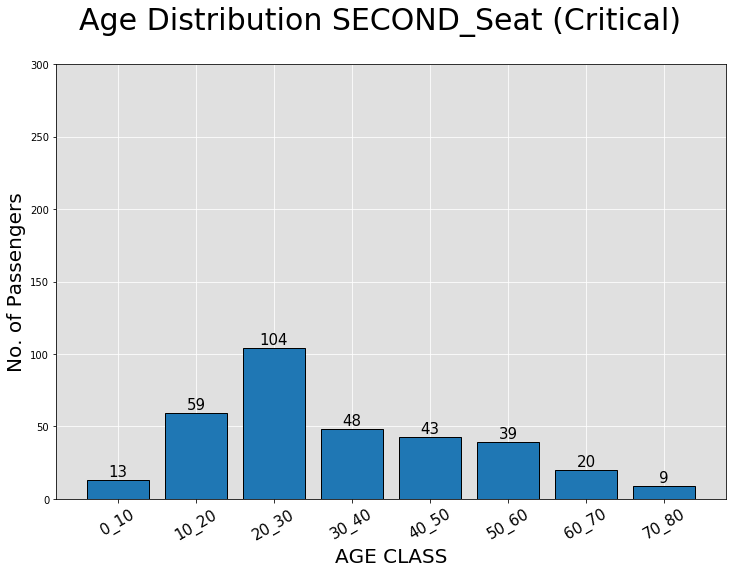

In [252]:
VGD_OCC = pd.merge(VGD, OCC, on = ["JPRCDSID","VEHNO"], how = "inner")
SEAT_VGD_OCC = pd.merge(VGD_OCC, SEAT, on = ["JPRCDSID","VEHNO", "OCCNO", "SEATPOS"], how = "inner")
M1_CLASS_SEAT_OCC = SEAT_VGD_OCC[SEAT_VGD_OCC["CLASS"].isin([1,2,3,4,5,6,11,12,13,21])]
M1_FAT_CLASS_SEAT_OCC = M1_CLASS_SEAT_OCC[M1_CLASS_SEAT_OCC["HISPID"].isin([1,2])]

M1_CLASS_SEAT_OCC = M1_CLASS_SEAT_OCC.copy()
M1_FAT_CLASS_SEAT_OCC = M1_FAT_CLASS_SEAT_OCC.copy()

M1_CLASS_SEAT_OCC["SEAT_Type"] = ["FRONT_Left" if(i in([11])) else "FRONT_Right" if(i in([13])) else "SECOND_Seat" if(i in([21,22,23,24,25])) else "OTHER" for i in M1_CLASS_SEAT_OCC["SEATPOS"]]
M1_FAT_CLASS_SEAT_OCC["SEAT_Type"] = ["FRONT_Left" if(i in([11])) else "FRONT_Right" if(i in([13])) else "SECOND_Seat" if(i in([21,22,23,24,25])) else "OTHER" for i in M1_FAT_CLASS_SEAT_OCC["SEATPOS"]]

M1_CLASS_SEAT_OCC["AGE_Type"] = ["0_10" if(i in(list(range(0,11)))) else "10_20" if(i in(list(range(11,21)))) else "20_30" if(i in(list(range(21,31)))) else "30_40" if(i in(list(range(31,41)))) else "40_50" if(i in(list(range(41,51)))) else "50_60" if(i in(list(range(51,61)))) else "60_70" if(i in(list(range(61,71)))) else "70_80" if(i in(list(range(71,81)))) else "80_90" if(i in(list(range(81,91)))) else "UNKNOWN" if(i in([999999])) else "Very_OLD" for i in M1_CLASS_SEAT_OCC["AGE"]]
M1_FAT_CLASS_SEAT_OCC["AGE_Type"] = ["0_10" if(i in(list(range(0,11)))) else "10_20" if(i in(list(range(11,21)))) else "20_30" if(i in(list(range(21,31)))) else "30_40" if(i in(list(range(31,41)))) else "40_50" if(i in(list(range(41,51)))) else "50_60" if(i in(list(range(51,61)))) else "60_70" if(i in(list(range(61,71)))) else "70_80" if(i in(list(range(71,81)))) else "80_90" if(i in(list(range(81,91))))  else "UNKNOWN" if(i in([999999])) else "Very_OLD" for i in M1_FAT_CLASS_SEAT_OCC["AGE"]]


GRP_M1_CLASS_SEAT_OCC = M1_CLASS_SEAT_OCC.groupby("SEAT_Type")
GRP_M1_FAT_CLASS_SEAT_OCC = M1_FAT_CLASS_SEAT_OCC.groupby("SEAT_Type")

for name, data in GRP_M1_CLASS_SEAT_OCC:
    if (name in ["FRONT_Left", "FRONT_Right", "SECOND_Seat"]):
        data_1 = data.groupby("AGE_Type")

#        print(GRP_M1_CLASS_OCC.size())
#        print(GRP_M1_FAT_CLASS_OCC.size())

        OCC_M1_name_1 = []
        OCC_M1_value_1 = []

        for name_in, value in data_1:
            if (name_in != "UNKNOWN"):
                OCC_M1_name_1.append(name_in)
                OCC_M1_value_1.append(len(value))
                
        Bar_plot(Values = OCC_M1_value_1, Labels = OCC_M1_name_1, Data_lab = OCC_M1_value_1 , Title = "Age Distribution "+ name, Xlabel = "AGE CLASS", Ylabel = "No. of Passengers", Ymin = 0, Ymax = 500)
        
for name, data in GRP_M1_FAT_CLASS_SEAT_OCC:
    if (name in ["FRONT_Left", "FRONT_Right", "SECOND_Seat"]):
        data_1 = data.groupby("AGE_Type")

#        print(GRP_M1_CLASS_OCC.size())
#        print(GRP_M1_FAT_CLASS_OCC.size())

        OCC_M1_name_2 = []
        OCC_M1_value_2 = []

        for name_in, value in data_1:
            if (name_in != "UNKNOWN"):
                OCC_M1_name_2.append(name_in)
                OCC_M1_value_2.append(len(value))
                
        Bar_plot(Values = OCC_M1_value_2, Labels = OCC_M1_name_2, Data_lab = OCC_M1_value_2 , Title = "Age Distribution "+ name + " (Critical)", Xlabel = "AGE CLASS", Ylabel = "No. of Passengers", Ymin = 0, Ymax = 300)
        
